In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polycystic-ovary-syndrome-pcos/pcos_rotterdam_balanceado.csv


# Data Loading and Preporcessing

In [2]:
df = pd.read_csv('/kaggle/input/polycystic-ovary-syndrome-pcos/pcos_rotterdam_balanceado.csv')
df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,0,46.1,9,0
1,20,20.5,0,59.4,6,0
2,23,23.1,0,69.3,10,0
3,19,32.7,1,77.7,37,1
4,19,25.9,0,49.4,5,0
...,...,...,...,...,...,...
2995,26,26.5,0,38.5,4,0
2996,42,15.5,0,40.6,8,0
2997,24,17.5,0,79.2,11,0
2998,35,20.9,0,40.9,10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   int64  
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 140.8 KB


In [4]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,30.052667,23.646000,0.289333,57.228267,10.732333,0.200000
std,7.549982,4.510006,0.453529,18.171066,8.471478,0.400067
min,18.000000,8.500000,0.000000,20.500000,3.000000,0.000000
25%,24.000000,20.800000,0.000000,45.200000,5.000000,0.000000
50%,30.000000,23.400000,0.000000,53.200000,8.000000,0.000000
75%,36.000000,26.300000,1.000000,64.100000,11.000000,0.000000
max,44.000000,44.700000,1.000000,136.400000,39.000000,1.000000


# Vizualizaion Section

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot

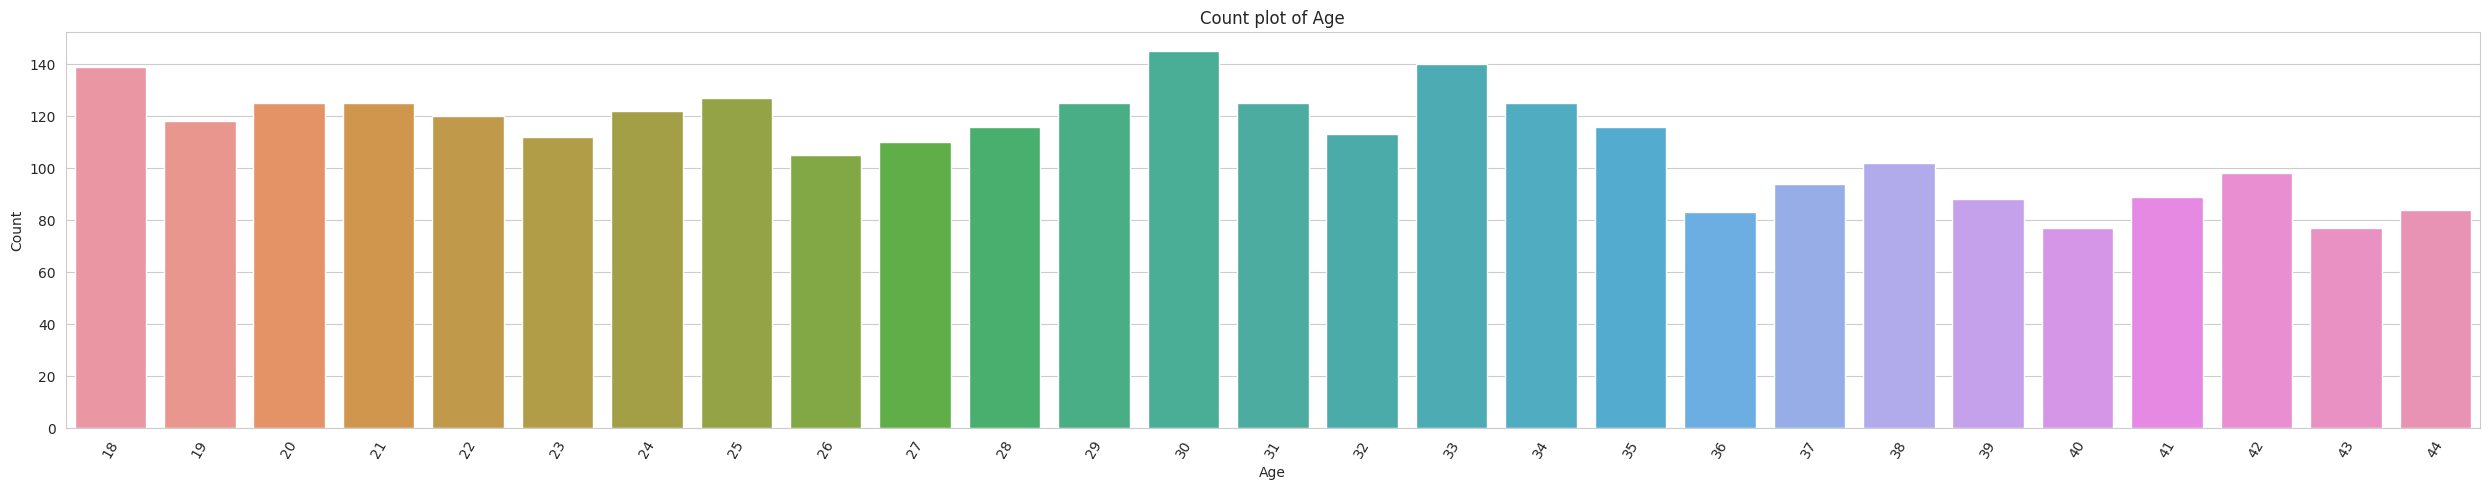

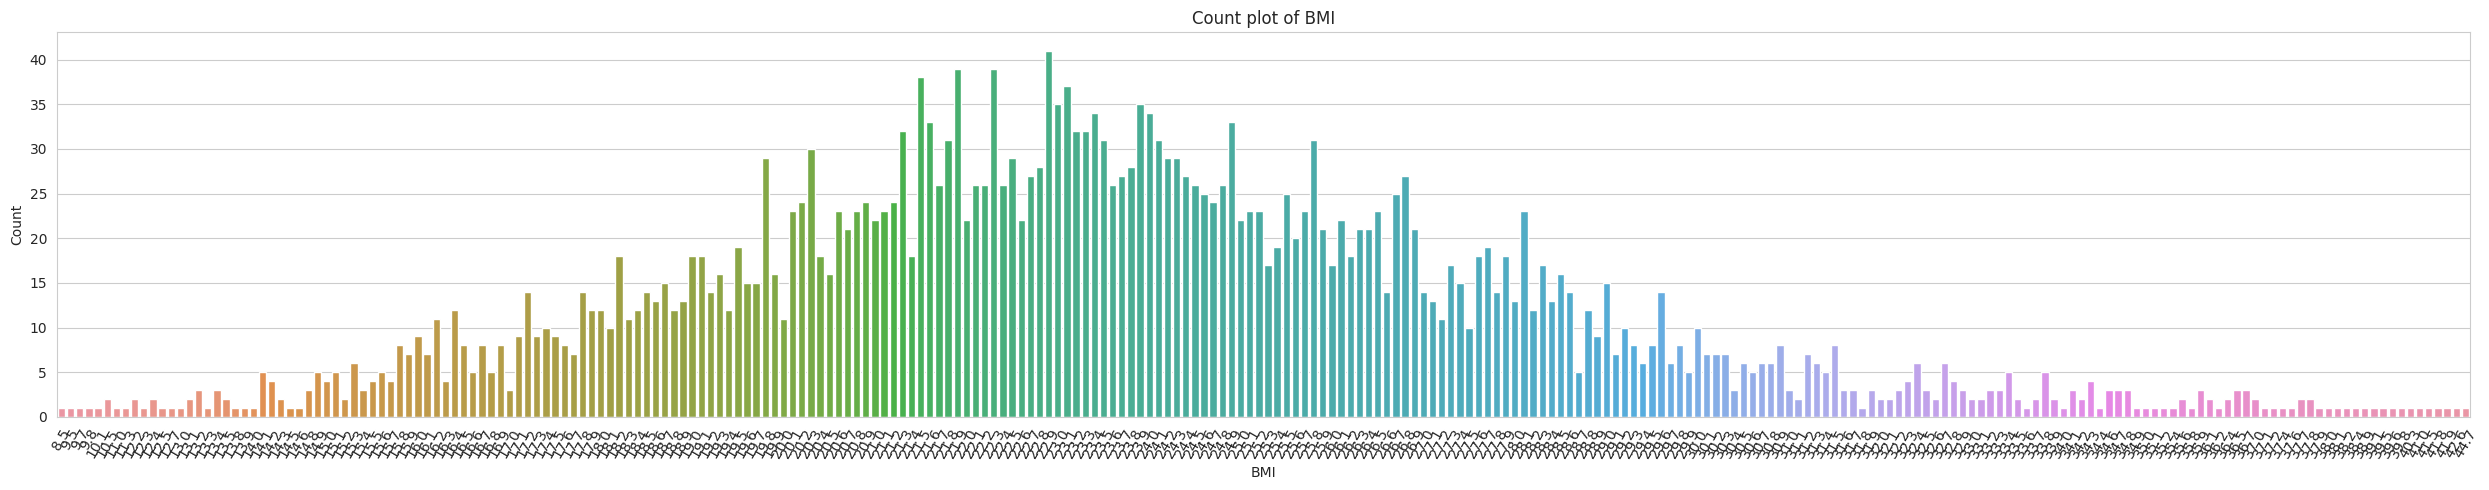

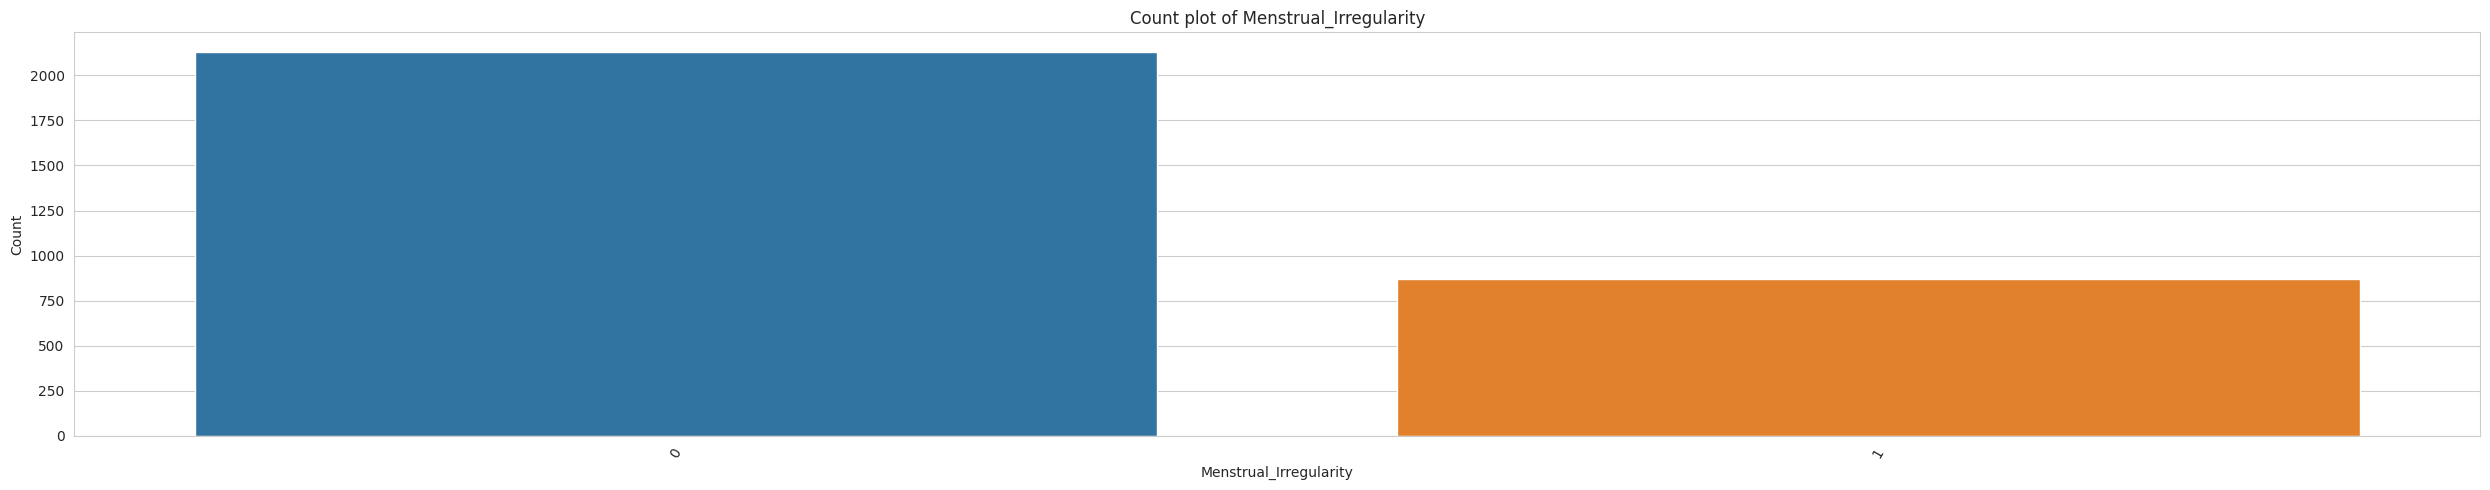

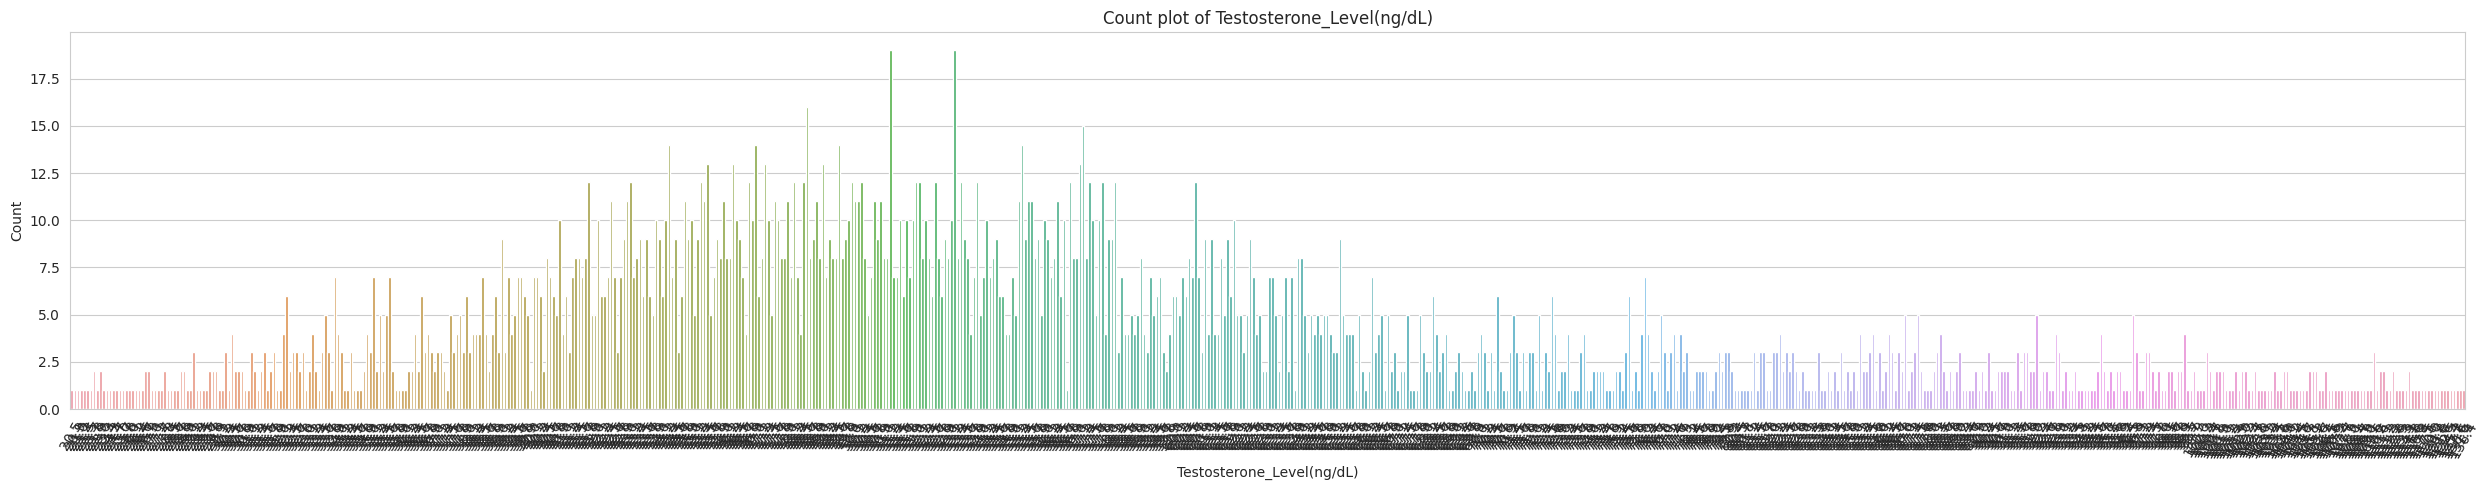

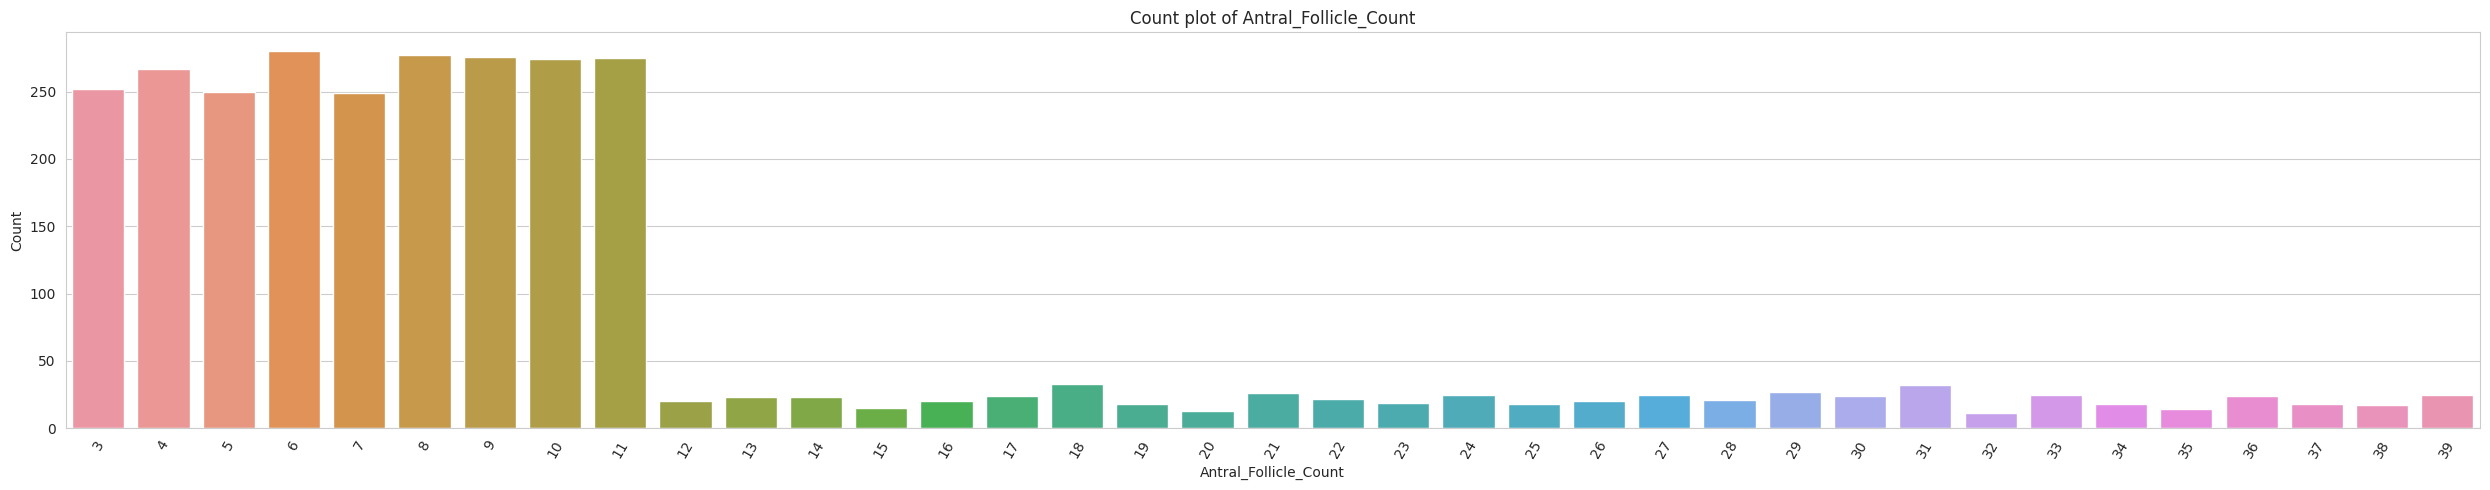

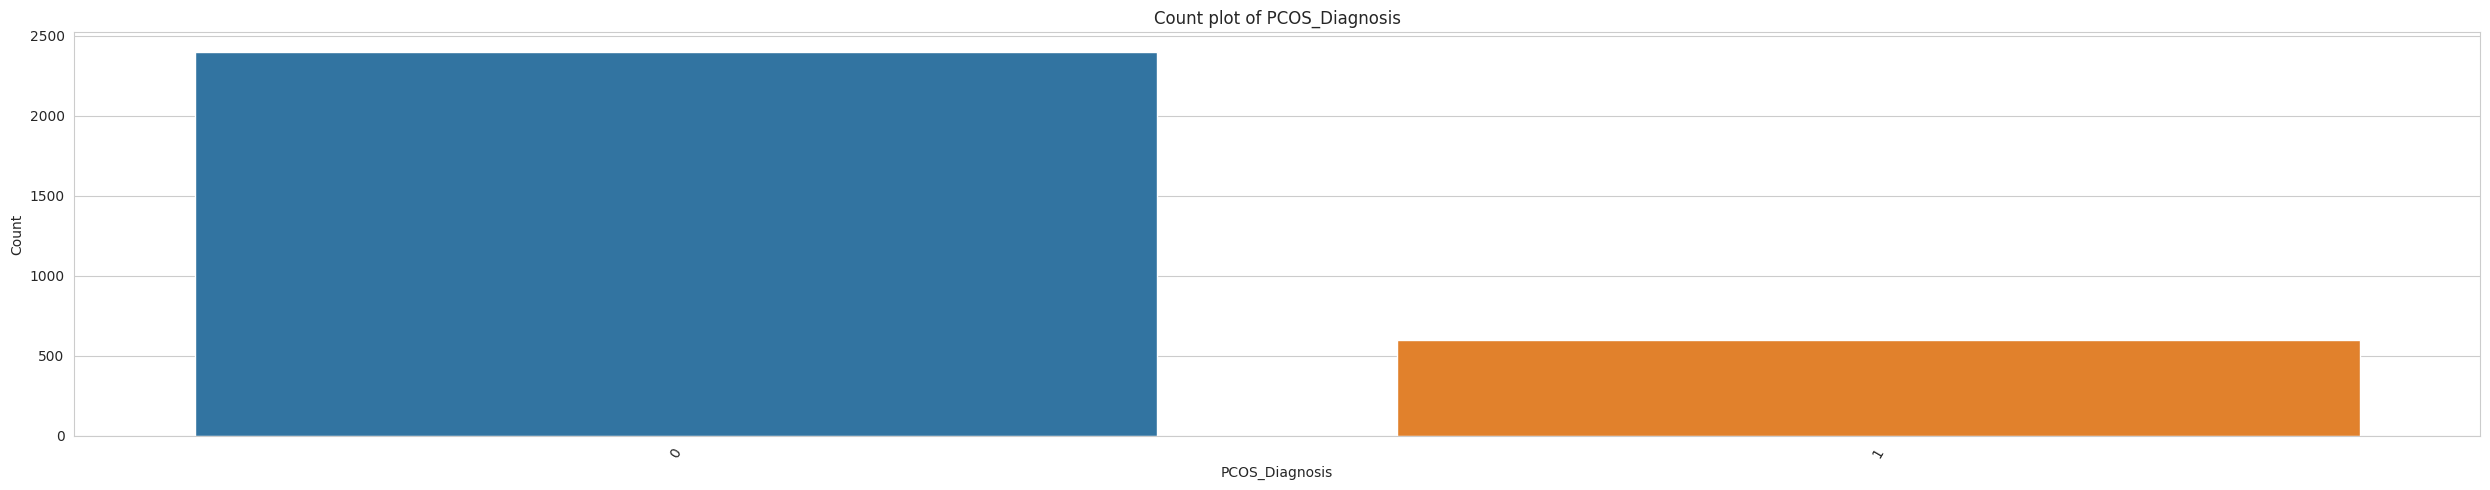

In [6]:
sns.set_style('whitegrid')
for features in df:
    if features in df.columns:
        plt.figure(figsize=(25,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

# Histogram Plot

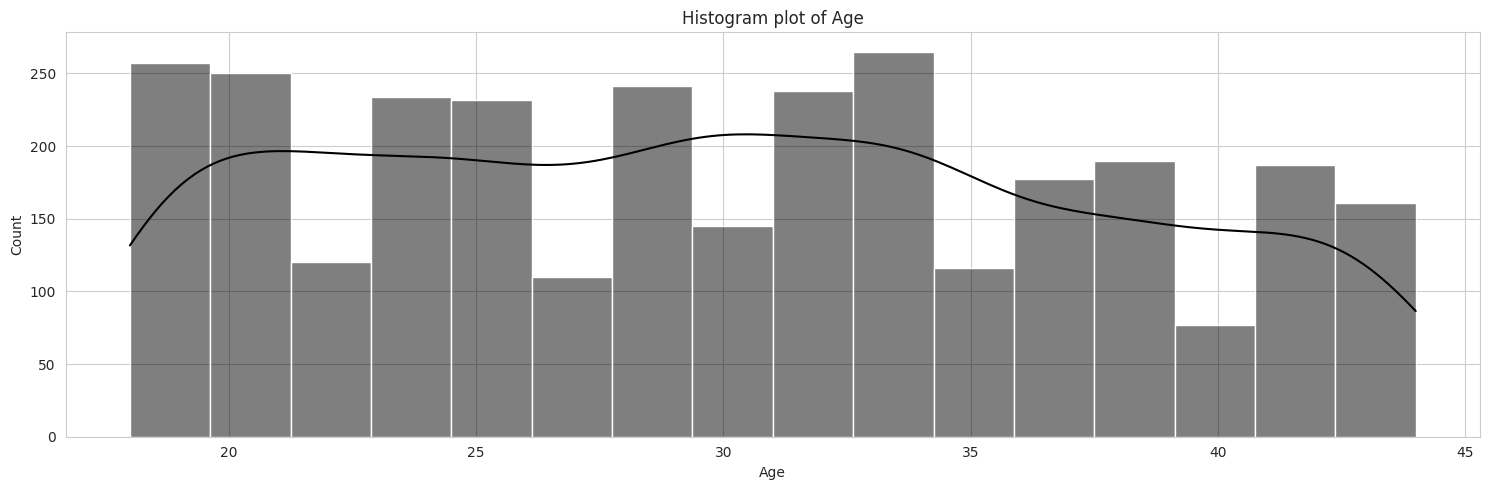

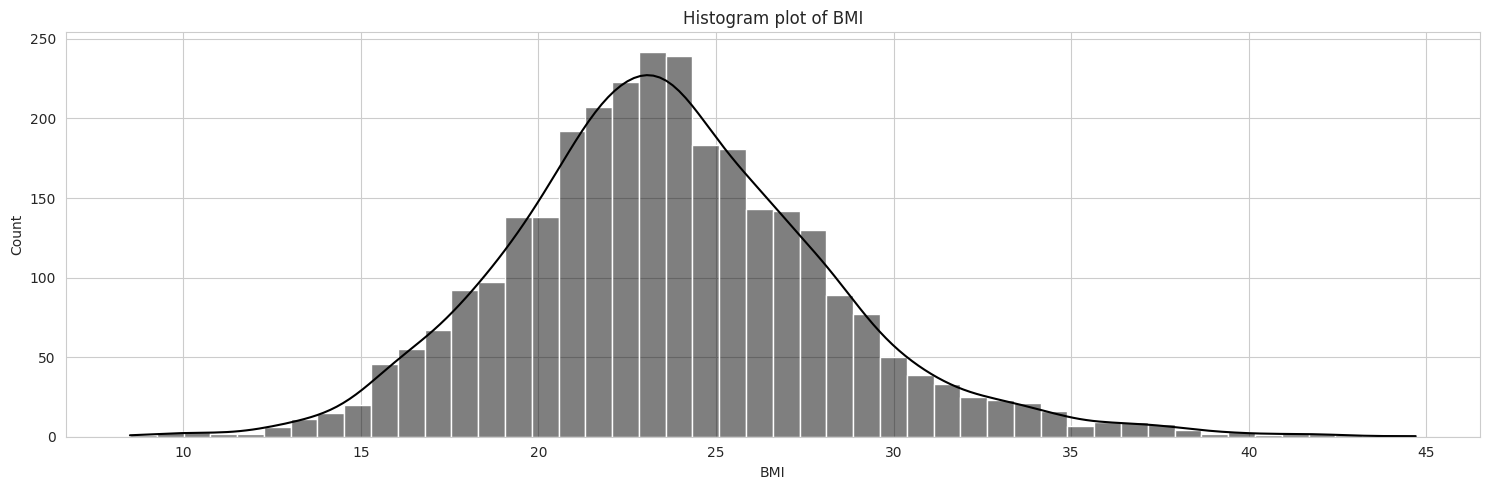

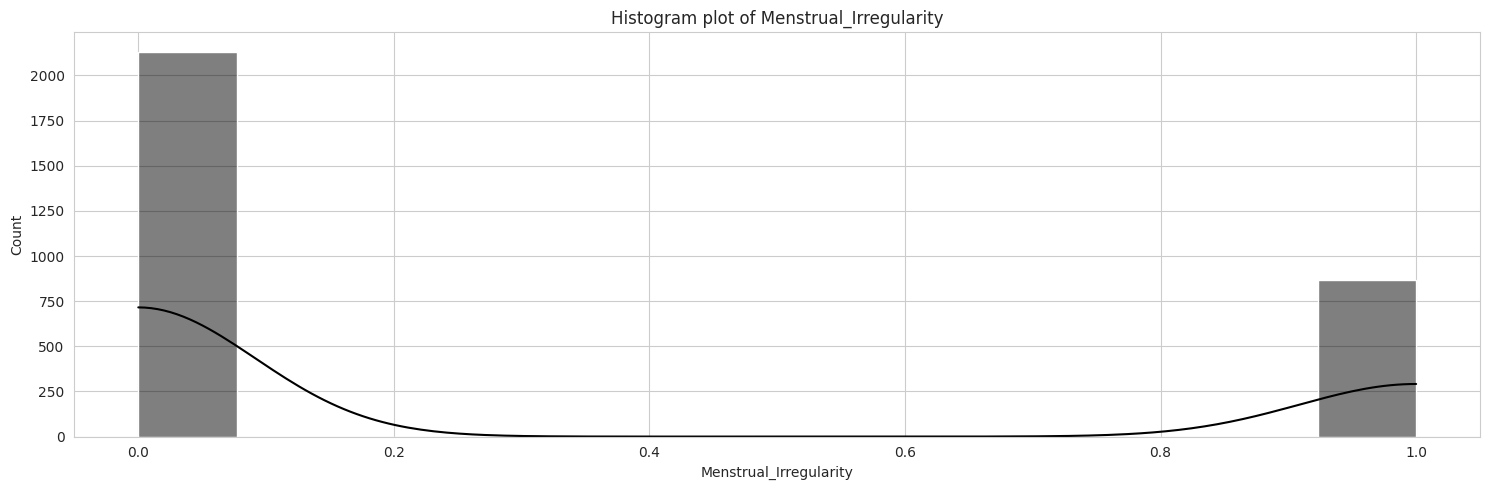

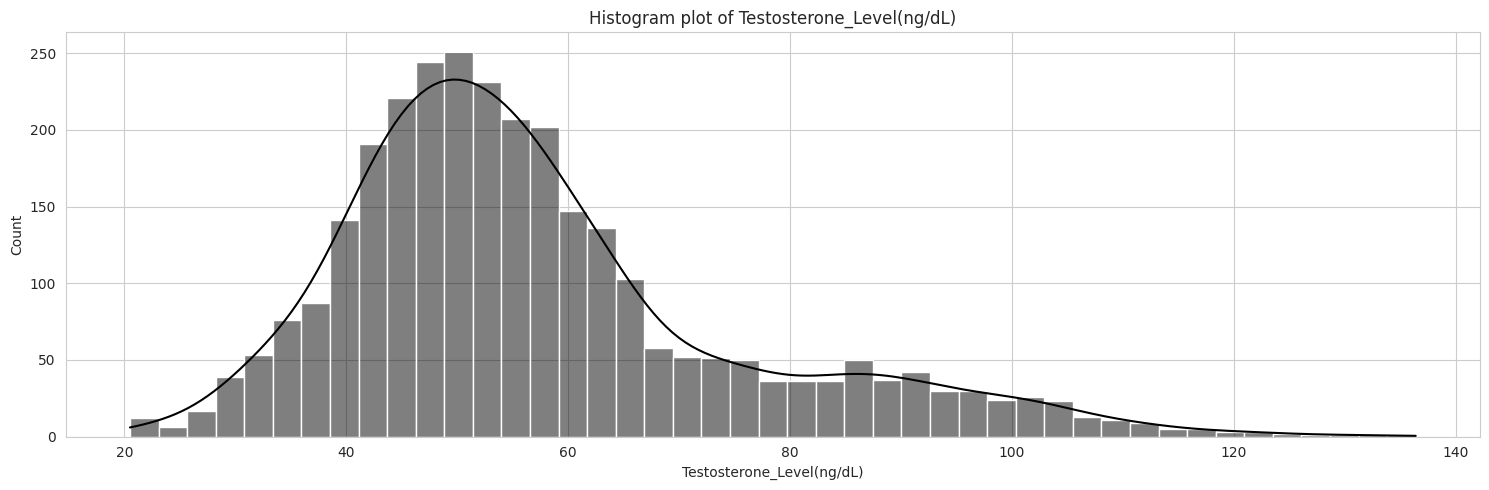

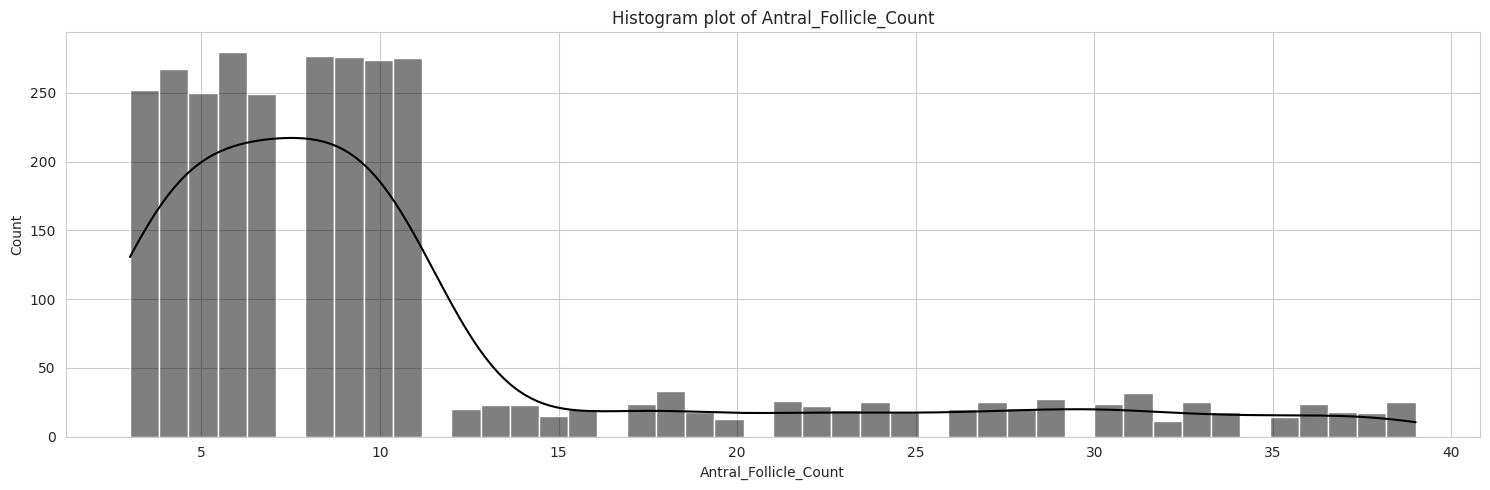

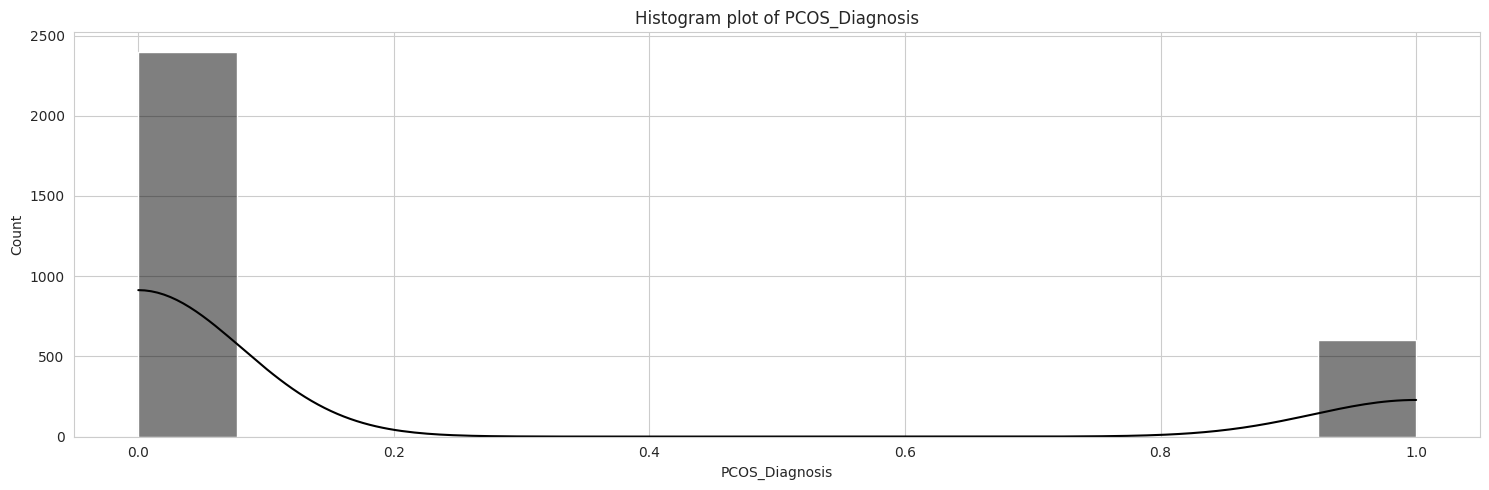

In [7]:
for features in df:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[features].dropna(),kde=True,color='black')
        plt.title(f'Histogram plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

# Scatter Plot for all features present in dataset

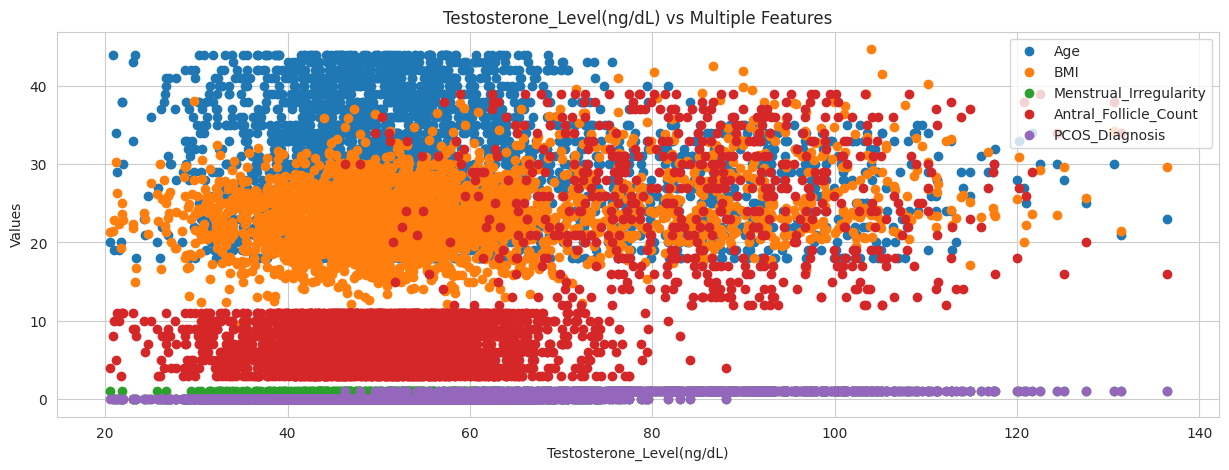

In [8]:
x_feature = 'Testosterone_Level(ng/dL)'
y_features = ['Age', 'BMI', 'Menstrual_Irregularity','Antral_Follicle_Count', 'PCOS_Diagnosis']

# Plot
plt.figure(figsize=(15, 5))

for y in y_features:
    plt.scatter(df[x_feature], df[y], label=y)  # Different colors by default

plt.xlabel(x_feature)
plt.ylabel("Values")
plt.title(f"{x_feature} vs Multiple Features")
plt.legend()
plt.grid(True)
plt.show()

# Correlataion Matrix

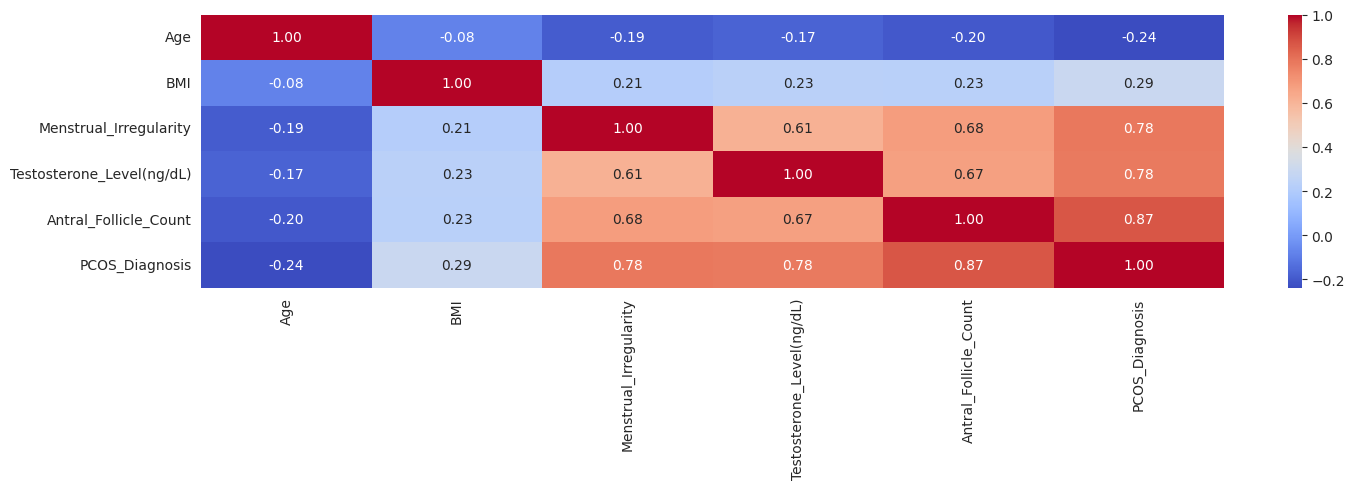

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >=4:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.tight_layout()
    plt.show()

# Model Section

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout,BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

2025-04-18 08:01:09.010333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744963269.264905      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744963269.336551      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


* Splitting

In [11]:
X = df.drop(columns=['PCOS_Diagnosis'])
y = df['PCOS_Diagnosis']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
pca = PCA(n_components=0.96)
X_train_pca = pca.fit_transform(X_train_scaled)

In [15]:
X_test_pca = pca.transform(X_test_scaled)

In [16]:
print("X_train_pca shape:", X_train_pca.shape)
print("y_train shape:", y_train.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_test shape:", y_test.shape)

X_train_pca shape: (2400, 5)
y_train shape: (2400,)
X_test_pca shape: (600, 5)
y_test shape: (600,)


* Model Training

In [17]:
# model = Sequential()
# model.add(Dense(128, input_shape=(X_train_pca.shape[1],), activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='tanh'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='relu'))  # binary classification


model = Sequential()
model.add(Dense(128,input_shape=(X_train_pca.shape[1],),activation='relu'))
# model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,input_shape=(X_train_pca.shape[1],),activation='tanh'))
# model.add(LeakyReLU(alpha=0.0003))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation='tanh'))
# model.add(LeakyReLU(alpha=0.00008))
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Train
model.fit(X_train_pca, y_train, epochs=50, batch_size=32,
          validation_data=(X_test_pca, y_test), callbacks=[lr_scheduler])

2025-04-18 08:01:25.236566: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8301 - loss: 1.5937 - val_accuracy: 0.9933 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.2439 - val_accuracy: 0.9950 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.1250 - val_accuracy: 0.9950 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.1096 - val_accuracy: 0.9967 - val_loss: 0.0298 - learning_rate: 0.0010
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0759 - val_accuracy: 0.9967 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0705 - val_accuracy: 0.9967 - val_loss: 0.0289 - learning_rate: 5.0000e-04
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0820 - val_accura

In [18]:
y_pred_probs = model.predict(X_test_pca)

y_pred_labels = np.argmax(y_pred_probs, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [19]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Precision (macro):", precision_score(y_test, y_pred_labels,average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_labels,average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_labels,average='macro'))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

Accuracy: 0.7683333333333333
Precision (macro): 0.38416666666666666
Recall (macro): 0.5
F1 Score (macro): 0.4344957587181904

Confusion Matrix:
 [[461   0]
 [139   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       461
           1       0.00      0.00      0.00       139

    accuracy                           0.77       600
   macro avg       0.38      0.50      0.43       600
weighted avg       0.59      0.77      0.67       600



# CONCLUSION:
> Acheaving accuracy around `~77%`.

> Need to improve Accuracy Score, probably balancing data should be better option.
>
> Probably ML.Algo will work better idk....
>
>  